### **Exercise - Random Forest Classifier for Customer Satisfaction**

#### Problem Statement

* We will develop a model that can predict customer satisfaction based on their purchasing behavior and product experience. 

* The goal is to predict whether a customer is **'Satisfied'** (1) or **'Dissatisfied'** (0) with a product. 

* We will use a `customer_satisfaction.csv` dataset with features like:

  * **`purchase_frequency`**: How often a customer buys products.
  * **`support_calls`**: The number of times a customer calls support.
  * **`product_quality`**: A rating of the product quality.
  * **`return_rate`**: The percentage of products returned.

* We will use a **Random Forest** classifier model for this task, leveraging its ability to produce highly accurate predictions and provide insights into which factors are most important for customer satisfaction.

#### Necessary Steps to be performed

  1.  **Import Libraries, Load and Explore Dataset**: Import the necessary libraries, load and explore the `customer_satisfaction.csv` dataset for analysis.

  2.  **Data Preprocessing**: Prepare the data for the model by converting categorical features into a numerical format.

  3.  **Define Features and Target**: Separate the dataset into feature variables (`X`) and the target variable (`y`).

  4.  **Split Data**: Divide the data into a training set and a testing set.

  5.  **Create and Train Model**: Instantiate a `RandomForestClassifier` and train it on the training data.
  
  6.  **Evaluate Model Performance**: Test the model's accuracy on the unseen data.

  7.  **Analyze Feature Importance**: Analyze which features were most influential in the model's predictions.

  8.  **Make Predictions**: Use the model to predict the satisfaction level for a new customer.

---


### Step 1: Import Libraries, Load and Explore Dataset

* First, we'll import the essential libraries, load and explore dataset for our analysis.

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Load the data
df = pd.read_csv('customer_satisfaction.csv')

print("--- First 5 rows of the dataset ---")
df.head()

--- First 5 rows of the dataset ---


,purchase_frequency,support_calls,product_quality,return_rate,satisfaction
0,7,1,High,0.063058,1
1,4,1,Low,0.107898,1
2,13,5,Medium,0.158145,0
3,11,0,High,0.063751,1
4,8,3,Medium,0.125178,1


In [15]:
print("\n--- Dataset info ---")
df.info()


--- Dataset info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   purchase_frequency  500 non-null    int64  
 1   support_calls       500 non-null    int64  
 2   product_quality     500 non-null    object 
 3   return_rate         500 non-null    float64
 4   satisfaction        500 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.7+ KB


### Step 2: Data Preprocessing

* Random Forest models in scikit-learn work with numerical data. 

* Our dataset contains a categorical feature, `product_quality`, which needs to be converted into a numerical format. 

* We will use `LabelEncoder` to transform 'High', 'Medium', and 'Low' into numerical values.

In [17]:
# Create a LabelEncoder instance
le_quality = LabelEncoder()

# Apply LabelEncoder to the 'product_quality' column
df['product_quality_n'] = le_quality.fit_transform(df['product_quality'])

# Display the DataFrame with the new numerical column
print("--- DataFrame after Label Encoding ---")
df.head()

--- DataFrame after Label Encoding ---


,purchase_frequency,support_calls,product_quality,return_rate,satisfaction,product_quality_n
0,7,1,High,0.063058,1,0
1,4,1,Low,0.107898,1,1
2,13,5,Medium,0.158145,0,2
3,11,0,High,0.063751,1,0
4,8,3,Medium,0.125178,1,2


### Step 3: Define Features and Target

* We now separate our data into features (`X`) and the target variable (`y`). 

* The features will be the numerical columns we use to make predictions, and the target will be the `satisfaction` column we want to predict.

In [18]:
# Define features (X) using the numerical columns
X = df[['purchase_frequency', 'support_calls', 'product_quality_n', 'return_rate']]
y = df['satisfaction']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (500, 4)
Target (y) shape: (500,)


### Step 4: Split Data into Training and Testing Sets

* To evaluate our model's performance on unseen data, we'll split the dataset into a training set (80%) and a testing set (20%).

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 400
Testing data size: 100


### Step 5: Create and Train the Random Forest Model

* We instantiate the `RandomForestClassifier` and train it on our training data using the `fit()` method.

* We'll start with 100 trees, which is often a good default value.

In [30]:
# Create an instance of the Random Forest Classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


### Step 6: Evaluate Model Performance

* After training, we use the `score()` method to calculate the model's accuracy on the testing data. 

* A high accuracy score indicates that our ensemble of trees has successfully learned the satisfaction patterns.

In [34]:
# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Model Accuracy on Test Data: 0.88


In [41]:
# We can also get predictions to see a more detailed report
y_pred = model.predict(X_test)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.93      0.56      0.70        25
           1       0.87      0.99      0.93        75

    accuracy                           0.88       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.89      0.88      0.87       100



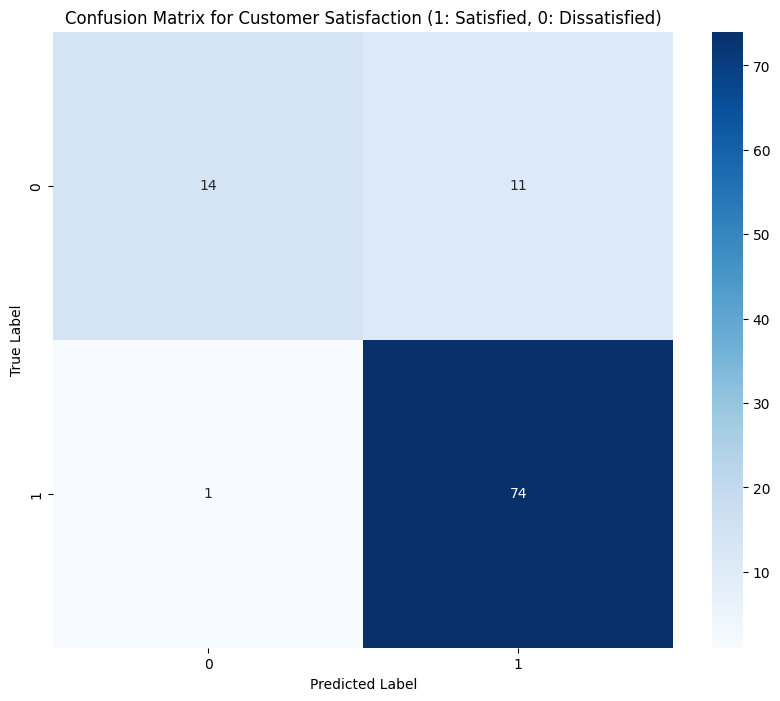

In [43]:
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Customer Satisfaction (1: Satisfied, 0: Dissatisfied)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Step 7: Analyze Feature Importance

* One of the benefits of Random Forest is the ability to determine which features were most important for making predictions. 

* We can extract this information from the trained model to gain insights into the data.

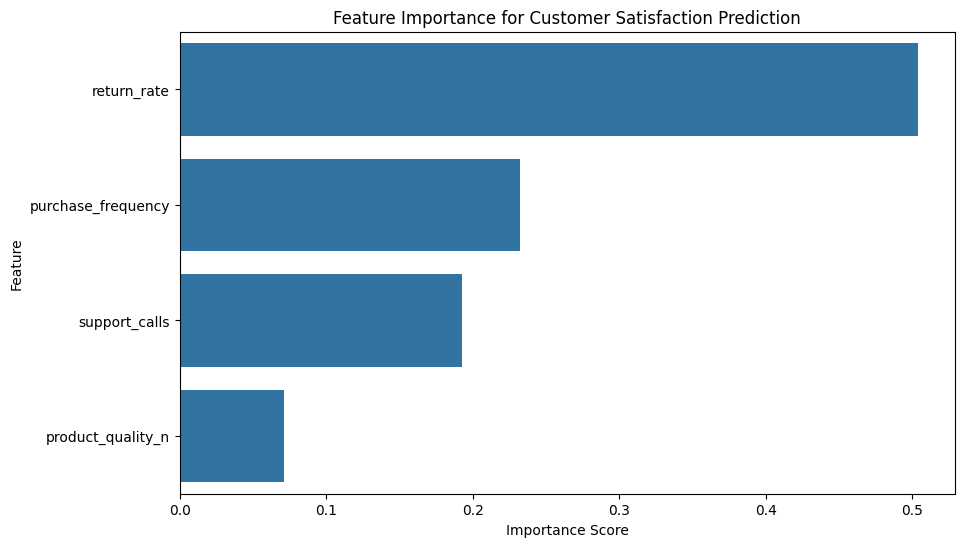

In [44]:
# Feature Importance from the trained Random Forest Model
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance for Customer Satisfaction Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Step 8: Make Predictions for a New Customer

* Finally, we can use our trained model to predict the satisfaction status of a new, hypothetical customer.

In [45]:
# Create a hypothetical new customer's data
# Features: purchase_frequency=10, support_calls=1, product_quality='High' (n=0), return_rate=0.05
new_customer = pd.DataFrame({
    'purchase_frequency': [10],
    'support_calls': [1],
    'product_quality_n': [0],
    'return_rate': [0.05]
})

# Make a prediction
prediction = model.predict(new_customer)

if prediction[0] == 1:
    print("This customer is predicted to be SATISFIED.")
else:
    print("This customer is predicted to be DISSATISFIED.")

This customer is predicted to be SATISFIED.


### Summary

* In this notebook, we've successfully built and trained a Random Forest classifier to predict customer satisfaction. We learned how to:

  * **Understand the Concept**: We covered the core principles of Random Forest, including ensemble learning and the power of combining multiple Decision Trees.

  * **Handle Categorical Data**: We used `LabelEncoder` to transform the 'product_quality' feature into a numerical format.

  * **Evaluate Performance**: We calculated an accuracy score and a classification report to measure the model's effectiveness on unseen data.

  * **Analyze Feature Importance**: We visualized which features were most influential in the model's predictions, providing valuable business insights.

  * **Make Predictions**: We used the trained model to make a prediction for a new customer, demonstrating its practical application. 

* This exercise highlights the robustness and insight-generating capabilities of the Random Forest algorithm.

---